# Neuroinformatics: Using Python for literature searches
### MAY 24, 2022
### Guest lecture by Monique Surles-Zeigler

In this notebook, you will learn to:
* Identify the conceptual and technical tools used to conduct informatics research (e.g. APIs, ontologies, bioentrez, BLAST)
* Identify the structure and use of json format
* Define MESH terms & describe their role in informatics research
* Explain the role and importance of informatics research
* Conduct a pubmed search using bioentrez

## Setup
We'll need many new packages that aren't in our DataHub for today's lab. To get everything setup, run our setup script below.

In [2]:
# Install packages that do not exist in DataHub
! pip install xmljson
! pip install xmltodict
! pip install Biopython

# Import many packages!
%run informatics_module/informatics_setup.py

Since we just did several things behind the scenes, let's take a look at the packages we imported.

In [3]:
%whos

Variable        Type        Data/Info
-------------------------------------
Entrez          module      <module 'Bio.Entrez' from<...>/Bio/Entrez/__init__.py'>
Tree            type        <class 'nltk.tree.Tree'>
comb_list       function    <function comb_list at 0x7f96974a7378>
getopt          module      <module 'getopt' from '/U<...>lib/python3.7/getopt.py'>
json            module      <module 'json' from '/Use<...>hon3.7/json/__init__.py'>
nltk            module      <module 'nltk' from '/Use<...>ckages/nltk/__init__.py'>
pd              module      <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
product         type        <class 'itertools.product'>
random          module      <module 'random' from '/U<...>lib/python3.7/random.py'>
requests        module      <module 'requests' from '<...>es/requests/__init__.py'>
sys             module      <module 'sys' (built-in)>
urllib          module      <module 'urllib' from '/U<...>n3.7/urllib/__init__.py'>
word_tokenize   functi

## Accessing NCBI databases with Biopython
Biopython is a set of freely available tools for biological computation written in Python. It contains a collection of python modules to search to deal with DNA, RNA & protein sequence operations such as reverse complementing of a DNA string, finding motifs in protein sequences, etc.

Bio.Entrez is the module within the BioPython package that provides code to access NCBI over the World Wide Web to retrieve various sorts of information. This module provides a number of functions which will return the data as a handle object. This is the standard interface used in Python for reading data from a file and provides methods or offers iteration over the contents line by line.

### Bio.Entrez is not the only sub-module in Biopython. [Other packages include](https://biopython.org/docs/1.75/api/index.html):
- Bio.GEO - Access to data from the Gene Expression Omibus database.
- Bio.KEGG - Access to data from the KEGG database.
- Bio.motifs - Access to tools for sequence motif analysis.

### Best practice/required information: 
- Always provide your email with Entrez.email = "youremail.com"

### Functions used in Bio.entrez

Bio.Entrez has a ton of different functions. We'll use a few (highlighted) in our notebook today. **Read more about these functions on [the website](https://www.ncbi.nlm.nih.gov/books/NBK25499/).**

- **eInfo** - Provides the number of records indexed in each field of a given database, the date of the last update of the database, and the available links from the database to other Entrez databases.
- **eSearch** - Responds to a text query with the list of matching **Entrez Unique Identifier (UIDs)** in a given database (for later use in ESummary, EFetch or ELink), along with the term translations of the query.
- ePost - Accepts a list of UIDs from a given database, stores the set on the History Server, and responds with a query key and web environment for the uploaded dataset.
- efetch - Retrieves records in the requested format from a list of one or more primary IDs or from the user’s environment
- elink  - Checks for the existence of an external or Related Articles link from a list of one or more primary IDs. Retrieves primary IDs and relevancy scores for links to Entrez databases or Related Articles; creates a hyperlink to the primary LinkOut provider for a specific ID and database, or lists LinkOut URLs and Attributes for multiple IDs.
- eSummary - Retrieves document summaries from a list of primary IDs or from the user’s environment.
- egQuery - Provides Entrez database counts in XML for a single search using Global Query.
- eSpell - Retrieves spelling suggestions.
- eCitmatch - Retrieves PubMed IDs (PMIDs) that correspond to a set of input citation strings.
- **read** - Parses the XML results returned by any of the above functions.



<div class="alert alert-success">

**Task**: Write your email below.

</div>

In [4]:
### provide your email as a string
Entrez.email = ...

As previously mentioned in the slides, the BioEntrez package provides access to multiple biomedical databases. Below, we'll use `einfo` and `read` to show the list of possible databases.

In [5]:
### access API to search for a list of databases in Bio.Entrez
# declare a variable (e.g.handle) where the results will be stored 
# pass within the Entrez.einfo() function.

handle = Entrez.einfo()
record = Entrez.read(handle)
print (record)

{'DbList': ['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']}


<div class="alert alert-success">

**Task**: Look for info about PubMed by specifying the `db="pubmed"` argument in our call to `Entrez.einfo` (otherwise, same code as above!).

</div>

In [6]:
# Look for info about a database - PubMed
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)
print (record)

{'DbInfo': {'DbName': 'pubmed', 'MenuName': 'PubMed', 'Description': 'PubMed bibliographic record', 'DbBuild': 'Build220524-2142m.3', 'Count': '34137266', 'LastUpdate': '2022/05/25 15:06', 'FieldList': [{'Name': 'ALL', 'FullName': 'All Fields', 'Description': 'All terms from all searchable fields', 'TermCount': '279296286', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'N', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'UID', 'FullName': 'UID', 'Description': 'Unique number assigned to publication', 'TermCount': '0', 'IsDate': 'N', 'IsNumerical': 'Y', 'SingleToken': 'Y', 'Hierarchy': 'N', 'IsHidden': 'Y'}, {'Name': 'FILT', 'FullName': 'Filter', 'Description': 'Limits the records', 'TermCount': '2002', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'Y', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'TITL', 'FullName': 'Title', 'Description': 'Words in title of publication', 'TermCount': '20382043', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'N', 'Hierarchy': 'N', 'IsHidden':

As you can see, this is a very big, complicated dictionary! It actually has multiple layers, kind of like an onion. If we just look for the keys, we'll only find one thing:

In [7]:
record.keys()

dict_keys(['DbInfo'])

So the first and only dictionary key is `DbInfo`. We need to then dig *into* the DbInfo dictionary for more information.

<div class="alert alert-success">

**Task**:
1. Print the list of keys for the `DbInfo` dictionary.
2. Print the `FieldList` within the DbInfo. **What kind of object is this? What is contained in it?** 
3. Using `FieldList`, figure out how many authors (`AUTH`), (`JOUR`), and MESH terms (`MESH`) are in this database.

</div>

In [8]:
# Work with the record dictionary
print(record['DbInfo'].keys())

for i in record['DbInfo']['FieldList']:
    print (i.keys(), i.values())

dict_keys(['DbName', 'MenuName', 'Description', 'DbBuild', 'Count', 'LastUpdate', 'FieldList', 'LinkList'])
dict_keys(['Name', 'FullName', 'Description', 'TermCount', 'IsDate', 'IsNumerical', 'SingleToken', 'Hierarchy', 'IsHidden']) dict_values(['ALL', 'All Fields', 'All terms from all searchable fields', '279296286', 'N', 'N', 'N', 'N', 'N'])
dict_keys(['Name', 'FullName', 'Description', 'TermCount', 'IsDate', 'IsNumerical', 'SingleToken', 'Hierarchy', 'IsHidden']) dict_values(['UID', 'UID', 'Unique number assigned to publication', '0', 'N', 'Y', 'Y', 'N', 'Y'])
dict_keys(['Name', 'FullName', 'Description', 'TermCount', 'IsDate', 'IsNumerical', 'SingleToken', 'Hierarchy', 'IsHidden']) dict_values(['FILT', 'Filter', 'Limits the records', '2002', 'N', 'N', 'Y', 'N', 'N'])
dict_keys(['Name', 'FullName', 'Description', 'TermCount', 'IsDate', 'IsNumerical', 'SingleToken', 'Hierarchy', 'IsHidden']) dict_values(['TITL', 'Title', 'Words in title of publication', '20382043', 'N', 'N', 'N', 'N'

### What are MESH terms?
- abbreviation for Medical Subject Headings
- Controlled vocabulary thesaurus produced by the National Library of Medicine (NLM) 
    - It consists of sets of terms naming descriptors in a hierarchical structure that permits searching at various levels of specificity.
    
*** Search for MESH terms - https://www.nlm.nih.gov/mesh/meshhome.html

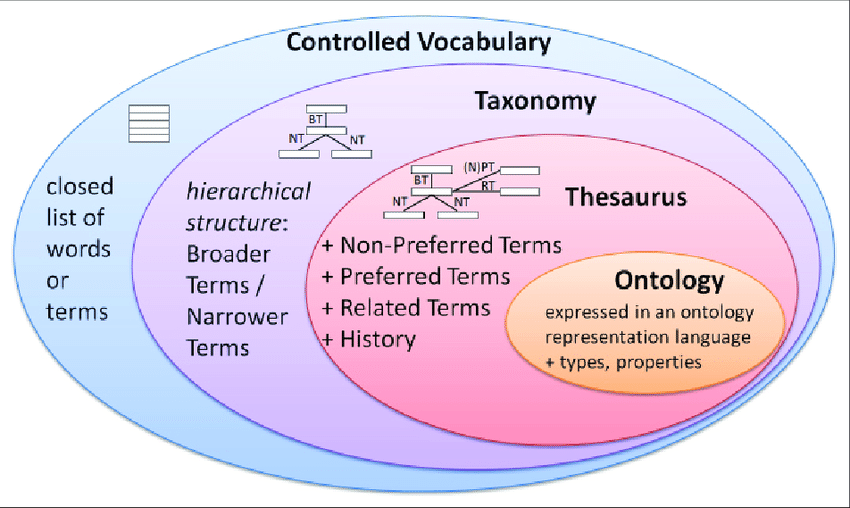. 

Kopácsi, S., Hudak, R., & Ganguly, R. (2017). Implementation of a classification server to support metadata organization for long term preservation systems. VOEB-Mitteilungen, 70(2), 225–243. https://doi.org/10.31263/voebm.v70i2.1897

<div class="alert alert-success">

**Task**:

1. Create a pubmed search using Bio.Entrez. You'll use the `esearch` function first. This will return the top 20 results by default. You'll use the same syntax as before, first defining a handle, then using the read function. [This website may help!](https://biopython-tutorial.readthedocs.io/en/latest/notebooks/09%20-%20Accessing%20NCBIs%20Entrez%20databases.html)
    
2. How do the search results differ from the PubMed user interface? 
    
3. Assign the `IdList` field to a variable `paper_ids`.
    
4. Use `paper_ids` and `efetch` to fetch the abstracts for these papers, using this syntax:
    
    ```
    abstracts = Entrez.efetch(db='pubmed', id=paper_ids, rettype='abstract')
    abstracts.read()
    ```
    
    
</div>

In [9]:
# Create your pubmed search here
pub_handle = Entrez.esearch(db = "pubmed", term='brains', retmode = "xml")
pub_record = Entrez.read(pub_handle)
paper_ids = pub_record["IdList"]

abstracts = Entrez.efetch(db='pubmed', id=paper_ids, rettype='abstract')
abstracts.read()

'<?xml version="1.0" ?>\n<!DOCTYPE PubmedArticleSet PUBLIC "-//NLM//DTD PubMedArticle, 1st January 2019//EN" "https://dtd.nlm.nih.gov/ncbi/pubmed/out/pubmed_190101.dtd">\n<PubmedArticleSet><PubmedArticle><MedlineCitation Status="Publisher" Owner="NLM"><PMID Version="1">35613894</PMID><DateRevised><Year>2022</Year><Month>05</Month><Day>25</Day></DateRevised><Article PubModel="Print-Electronic"><Journal><ISSN IssnType="Electronic">1529-2401</ISSN><JournalIssue CitedMedium="Internet"><PubDate><Year>2022</Year><Month>May</Month><Day>25</Day></PubDate></JournalIssue><Title>The Journal of neuroscience : the official journal of the Society for Neuroscience</Title><ISOAbbreviation>J Neurosci</ISOAbbreviation></Journal><ArticleTitle>Erratum: Krausova et al., "Site of Action of Brain Neurosteroid Pregnenolone Sulfate at the N-Methyl-D-Aspartate Receptor".</ArticleTitle><ELocationID EIdType="pii" ValidYN="Y">JN-ERR-0842-22</ELocationID><ELocationID EIdType="doi" ValidYN="Y">10.1523/JNEUROSCI.0842

Now, let's do a more complicated search using the same basic concepts.  

We'll define a function below to iterate over multiple terms. Then, we will locate PubMed articles that may identify gene product in primary cell types in the hippocampus and then pull the text from articles that are accessible in PubMed Central.

In [10]:
# Define the function

def comb_list(brain_region, cell_type, method):
    '''iterate over terms given - in this case brain region, cell type and method'''
    all_list = list(product(brain_region, method, cell_type))
    new_list = [list(i) for i in all_list]
    terms = [" AND ".join(i) for i in new_list]
    return terms

In [11]:
# Use the function

brain_region = ["hippocampus"]

cell_type = ["CA1 pyramidal cell", "CA2 pyramidal cell", "CA3 pyramidal cell", "CA4 Pyramidal Cell", "Dentate Gyrus Granule Cell", "Dentate Gyrus Basket Cell", "CA1 Basket Cell"]

method = ["rna seq* ","microarray","in situ hybridization", "polymerase chain reaction"]

terms = comb_list(brain_region, cell_type, method)
terms


['hippocampus AND rna seq*  AND CA1 pyramidal cell',
 'hippocampus AND rna seq*  AND CA2 pyramidal cell',
 'hippocampus AND rna seq*  AND CA3 pyramidal cell',
 'hippocampus AND rna seq*  AND CA4 Pyramidal Cell',
 'hippocampus AND rna seq*  AND Dentate Gyrus Granule Cell',
 'hippocampus AND rna seq*  AND Dentate Gyrus Basket Cell',
 'hippocampus AND rna seq*  AND CA1 Basket Cell',
 'hippocampus AND microarray AND CA1 pyramidal cell',
 'hippocampus AND microarray AND CA2 pyramidal cell',
 'hippocampus AND microarray AND CA3 pyramidal cell',
 'hippocampus AND microarray AND CA4 Pyramidal Cell',
 'hippocampus AND microarray AND Dentate Gyrus Granule Cell',
 'hippocampus AND microarray AND Dentate Gyrus Basket Cell',
 'hippocampus AND microarray AND CA1 Basket Cell',
 'hippocampus AND in situ hybridization AND CA1 pyramidal cell',
 'hippocampus AND in situ hybridization AND CA2 pyramidal cell',
 'hippocampus AND in situ hybridization AND CA3 pyramidal cell',
 'hippocampus AND in situ hybrid

Below, we'll use a script (`informatics_functions.py`) to define two short functions and a couple lengthy functions in the file `informatics_functions.py`.

<div class="alert alert-success">

Take a look at the `findformat_abstract` function within the script closely -- what is it doing?

</div>

In [23]:
# Run functions script and show functions that we have available
%run informatics_module/informatics_functions.py
%whos

Variable              Type                 Data/Info
----------------------------------------------------
Entrez                module               <module 'Bio.Entrez' from<...>/Bio/Entrez/__init__.py'>
Tree                  type                 <class 'nltk.tree.Tree'>
abstracts             TextIOWrapper        <_io.TextIOWrapper encoding='utf-8'>
brain_region          list                 n=1
cell_type             list                 n=7
comb_list             function             <function comb_list at 0x7f96974a7598>
deepcopy              function             <function deepcopy at 0x7f9692fc19d8>
findformat_abstract   function             <function findformat_abstract at 0x7f969c19d1e0>
fromstring            function             <function XML at 0x7f96977d7048>
gene_abstract_cp      dict                 n=1044
gene_abstract_df      DataFrame                                     <...>n[12 rows x 1044 columns]
gene_abstracts        dict                 n=1044
getTexts              f

In [13]:
#get all abstracts   
new_abstracts = {}
gene_abstracts = findformat_abstract(terms) 

#only get the abstracts with pmc ids
pmc_abstracts = {k: v for k, v in gene_abstracts.items() if len(v['PMC']) > 0} 

# This is a way to make a copy of dictionary, as a backup in case
#  Deepcopy () copies all the elements of an object as well as the memory location that contains data rather than containing the data itself.
gene_abstract_cp = deepcopy(gene_abstracts)
pmc_abstract_cp = deepcopy(pmc_abstracts)

Please provide email address: ajuavine@ucsd.edu


In [14]:
# Print gene abstracts
gene_abstracts

{'30375971': {'Search Terms': ['hippocampus AND rna seq*  AND CA1 pyramidal cell'],
  'DOI': ['10.7554/eLife.37701'],
  'PMC': ['PMC6226292'],
  'Date': ('10', '30', '2018'),
  'Authors': ['Cembrowski Mark S MS',
   'Wang Lihua L',
   'Lemire Andrew L AL',
   'Copeland Monique M',
   'DiLisio Salvatore F SF',
   'Clements Jody J',
   'Spruston Nelson N'],
  'Journal': 'eLife',
  'Title': 'The subiculum is a patchwork of discrete subregions.',
  'Abstract': 'In the hippocampus, the classical pyramidal cell type of the subiculum acts as a primary output, conveying hippocampal signals to a diverse suite of downstream regions. Accumulating evidence suggests that the subiculum pyramidal cell population may actually be comprised of discrete subclasses. Here, we investigated the extent and organizational principles governing pyramidal cell heterogeneity throughout the mouse subiculum. Using single-cell RNA-seq, we find that the subiculum pyramidal cell population can be deconstructed into eig

In [15]:
print ('original count', len(gene_abstracts))
print('PMC:', len(pmc_abstracts))
print('difference =', len(gene_abstracts)-len(pmc_abstracts))

original count 1044
PMC: 273
difference = 771


<div class="alert alert-success">

The length of `pmc_abstracts` is less than that of `gene_abstract`. Why is that?

</div>

## Read results as a dataframe
It's difficult to visually parse dictionaries. Thankfully we have another tool at our disposal: pandas.

<div class="alert alert-success">
    
**Task**: Turn `gene_abstract` into a pandas dataframe called `gene_abstract_df`.
    
</div>

In [17]:
# Turn gene_abstract into a df
import pandas as pd

gene_abstract_df = pd.DataFrame(gene_abstracts)
gene_abstract_df.head()

,30375971,26777276,27113915,31740815,35188100,28380666,33299180,32381505,30082781,33582968,...,17146780,11762707,12823475,24660528,15694259,15062973,12576146,9581019,10218790,9502804
Search Terms,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,[hippocampus AND rna seq* AND CA1 pyramidal c...,...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...,[hippocampus AND polymerase chain reaction AND...
DOI,[10.7554/eLife.37701],[10.1016/j.neuron.2015.12.013],[10.7554/eLife.14997],[10.1038/s41592-019-0631-4],[10.7554/eLife.73162],[10.1002/hipo.22731],[10.1038/s41586-020-3031-0],[10.1074/jbc.AC120.012571],[10.1038/s41467-018-05418-8],[10.1007/s11064-021-03241-0],...,[10.1002/dvg.20256],[10.1385/ENDO:15:3:323],[10.1046/j.1460-9568.2003.02712.x],[10.7754/clin.lab.2013.130320],[10.1016/j.neulet.2004.11.008],[10.1016/j.neuroscience.2004.01.040],[10.1016/s0361-9230(02)00965-6],[10.1039/a706355e],[10.1016/s0306-4522(98)00489-8],[]
PMC,[PMC6226292],[],[PMC4846374],[PMC6949128],[PMC8940174],[PMC5501956],[PMC7864877],[PMC7307194],[PMC6079101],[],...,[],[],[],[],[],[PMC2441871],[],[],[],[PMC6793096]
Date,"(10, 30, 2018)",NONE,"(04, 26, 2016)","(11, 18, 2019)","(02, 21, 2022)","(04, 22, 2017)","(12, 09, 2020)","(05, 07, 2020)","(08, 06, 2018)","(02, 13, 2021)",...,NONE,NONE,NONE,NONE,"(12, 10, 2004)",NONE,NONE,NONE,NONE,NONE
Authors,"[Cembrowski Mark S MS, Wang Lihua L, Lemire An...","[Cembrowski Mark S MS, Bachman Julia L JL, Wan...","[Cembrowski Mark S MS, Wang Lihua L, Sugino Ke...","[Qian Xiaoyan X, Harris Kenneth D KD, Hauling ...","[Tsoi Sau Yee SY, Öncül Merve M, Svahn Ella E,...","[Piras Ignazio S IS, Krate Jonida J, Schrauwen...","[Yap Ee-Lynn EL, Pettit Noah L NL, Davis Chris...","[Uchigashima Motokazu M, Leung Ming M, Watanab...","[Jaeger Baptiste N BN, Linker Sara B SB, Paryl...","[Li Jun J, Zhao Hongyu H, Xing Yongqiang Y, Zh...",...,"[Goebbels Sandra S, Bormuth Ingo I, Bode Ulli ...","[Greiner M M, Cárdenas S S, Parra C C, Bravo J...","[Håvik Bjarte B, Røkke Håvard H, Bårdsen Kjeti...","[Dang Jing J, Tian Fafa F, Li Fengrong F, Huan...","[Chen J J, Larionov S S, Pitsch J J, Hoerold N...","[Zhang G G, Raol Y H YH, Hsu F-C FC, Coulter D...","[Szakács Réka R, Weiczner Roland R, Mihály And...","[Percy M E ME, Wong S S, Bauer S S, Liaghati-N...","[Clatworthy A E AE, Stockinger W W, Christie R...","[Berger T T, Schwarz C C, Kraushaar U U, Monye..."


Hmm, it would make a lot more sense if each paper had its own row -- that's how we typically conceptualize dataframes, with each row as a different observation, patient, cell, etc. We can **transpose** the dataframe using the [`transpose`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) (or `T` for short) method.

In [18]:
#transposed data frame
papers_df = gene_abstract_df.T
papers_df

,Search Terms,DOI,PMC,Date,Authors,Journal,Title,Abstract,MESH,Methods,Results,fit_main_keywords
30375971,[hippocampus AND rna seq* AND CA1 pyramidal c...,[10.7554/eLife.37701],[PMC6226292],"(10, 30, 2018)","[Cembrowski Mark S MS, Wang Lihua L, Lemire An...",eLife,The subiculum is a patchwork of discrete subre...,"In the hippocampus, the classical pyramidal ce...","[Animals, CA1 Region, Hippocampal, Gene Expres...",[],[],[]
26777276,[hippocampus AND rna seq* AND CA1 pyramidal c...,[10.1016/j.neuron.2015.12.013],[],NONE,"[Cembrowski Mark S MS, Bachman Julia L JL, Wan...",Neuron,Spatial Gene-Expression Gradients Underlie Pr...,Tissue and organ function has been conventiona...,"[Animals, CA1 Region, Hippocampal, Female, Gen...",[],[],[]
27113915,[hippocampus AND rna seq* AND CA1 pyramidal c...,[10.7554/eLife.14997],[PMC4846374],"(04, 26, 2016)","[Cembrowski Mark S MS, Wang Lihua L, Sugino Ke...",eLife,Hipposeq: a comprehensive RNA-seq database of ...,Clarifying gene expression in narrowly defined...,"[Animals, Databases, Nucleic Acid, High-Throug...",[],[],[]
31740815,[hippocampus AND rna seq* AND CA1 pyramidal c...,[10.1038/s41592-019-0631-4],[PMC6949128],"(11, 18, 2019)","[Qian Xiaoyan X, Harris Kenneth D KD, Hauling ...",Nature methods,Probabilistic cell typing enables fine mapping...,Understanding the function of a tissue require...,"[Algorithms, Animals, CA1 Region, Hippocampal,...",[],[],[]
35188100,[hippocampus AND rna seq* AND CA1 pyramidal c...,[10.7554/eLife.73162],[PMC8940174],"(02, 21, 2022)","[Tsoi Sau Yee SY, Öncül Merve M, Svahn Ella E,...",eLife,Telencephalic outputs from the medial entorhin...,Complementary actions of the neocortex and the...,"[Animals, Entorhinal Cortex, Hippocampus, Inte...",[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
15062973,[hippocampus AND polymerase chain reaction AND...,[10.1016/j.neuroscience.2004.01.040],[PMC2441871],NONE,"[Zhang G G, Raol Y H YH, Hsu F-C FC, Coulter D...",Neuroscience,Effects of status epilepticus on hippocampal G...,Long-term GABA(A) receptor alterations occur i...,"[Age Factors, Animals, Animals, Newborn, Blott...",[],[],[]
12576146,[hippocampus AND polymerase chain reaction AND...,[10.1016/s0361-9230(02)00965-6],[],NONE,"[Szakács Réka R, Weiczner Roland R, Mihály And...",Brain research bulletin,Non-competitive NMDA receptor antagonists mode...,We examined the effects of non-competitive NMD...,"[4-Aminopyridine, Amantadine, Animals, Behavio...",[],[],[]
9581019,[hippocampus AND polymerase chain reaction AND...,[10.1039/a706355e],[],NONE,"[Percy M E ME, Wong S S, Bauer S S, Liaghati-N...",The Analyst,Iron metabolism and human ferritin heavy chain...,Ferritin is a ubiquitous protein which plays a...,"[Adult, Alzheimer Disease, Base Sequence, DNA,...",[],[],[]
10218790,[hippocampus AND polymerase chain reaction AND...,[10.1016/s0306-4522(98)00489-8],[],NONE,"[Clatworthy A E AE, Stockinger W W, Christie R...",Neuroscience,Expression and alternate splicing of apolipopr...,Apolipoprotein E isoforms affect the risk of d...,"[Alternative Splicing, Alzheimer Disease, Anim...",[],[],[]


<div class="alert alert-success">

**Task**: Using the `iloc` method, view *just* the first abstract.
    
</div>

In [26]:
papers_df['Title']

30375971    The subiculum is a patchwork of discrete subre...
26777276    Spatial Gene-Expression Gradients Underlie  Pr...
27113915    Hipposeq: a comprehensive RNA-seq database of ...
31740815    Probabilistic cell typing enables fine mapping...
35188100    Telencephalic outputs from the medial entorhin...
                                  ...                        
15062973    Effects of status epilepticus on hippocampal G...
12576146    Non-competitive NMDA receptor antagonists mode...
9581019     Iron metabolism and human ferritin heavy chain...
10218790    Expression and alternate splicing of apolipopr...
9502804     Dentate gyrus basket cell GABAA receptors are ...
Name: Title, Length: 1044, dtype: object

In [20]:
# Look at the first abstract here
papers_df.iloc[0]['Abstract']

'In the hippocampus, the classical pyramidal cell type of the subiculum acts as a primary output, conveying hippocampal signals to a diverse suite of downstream regions. Accumulating evidence suggests that the subiculum pyramidal cell population may actually be comprised of discrete subclasses. Here, we investigated the extent and organizational principles governing pyramidal cell heterogeneity throughout the mouse subiculum. Using single-cell RNA-seq, we find that the subiculum pyramidal cell population can be deconstructed into eight separable subclasses. These subclasses were mapped onto abutting spatial domains, ultimately producing a complex laminar and columnar organization with heterogeneity across classical dorsal-ventral, proximal-distal, and superficial-deep axes. We further show that these transcriptomically defined subclasses correspond to differential protein products and can be associated with specific projection targets. This work deconstructs the complex landscape of su

In [ ]:
#format the Methods and Results section 
g_updated_records = getTexts(gene_abstracts)

In [ ]:
#make another copy of the file since a lot of information is in here.
pmc_papers = deepcopy(g_updated_records)
pmc_papers

## Save results as a json & excel file

Below, we'll save our findings as both a json and an Excel file.

**Json?**  
JavaScript Object Notation (JSON) is a standardized format commonly used to transfer data between systems and used by a lot of databases and APIs. 
Like Python dictionaries, it represents objects as name/value pairs.


In [ ]:
#save file as a json file
with open('g_updated_records.json', 'w') as outfile:        
    json.dump(g_updated_records, outfile)
    
#read in json file    
with open('g_updated_records.json', 'r') as newfile:
    g_updated_records = json.load(newfile)
    
#save file to an excel file - save file as pandas dataframe, save to excel
df_updated_records = dp = pd.DataFrame(gene_abstract).T
g_update_records.to_excel('g_updated_records.json.xlsx')
